In [33]:
#necessary package 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

In [8]:
#import dataset

In [9]:
try:
    # Attempt to read the CSV file with 'utf-8' encoding
    df = pd.read_csv("/home/omayed/ML/dataset/my2024-fuel-consumption-ratings.csv", encoding='utf-8')
except UnicodeDecodeError:
    # If the 'utf-8' decode fails, try decoding with 'latin-1'
    df = pd.read_csv("/home/omayed/ML/dataset/my2024-fuel-consumption-ratings.csv", encoding='latin-1')

In [10]:
df.head()

,Model year,Make,Model,Vehicle class,Engine size (L),Cylinders,Transmission,Fuel type,City (L/100 km),Highway (L/100 km),Combined (L/100 km),Combined (mpg),CO2 emissions (g/km),CO2 rating,Smog rating
0,2024,Acura,Integra A-SPEC,Full-size,1.5,4,AV7,Z,8.1,6.5,7.4,38,172,6,7
1,2024,Acura,Integra A-SPEC,Full-size,1.5,4,M6,Z,8.9,6.5,7.8,36,181,6,6
2,2024,Acura,Integra Type S,Full-size,2.0,4,M6,Z,11.1,8.3,9.9,29,230,5,6
3,2024,Acura,MDX SH-AWD,Sport utility vehicle: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
4,2024,Acura,MDX SH-AWD Type S,Sport utility vehicle: Standard,3.0,6,AS10,Z,13.8,11.2,12.4,23,291,4,5


In [4]:
df.shape

(739, 15)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 739 entries, 0 to 738
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model year            739 non-null    int64  
 1   Make                  739 non-null    object 
 2   Model                 739 non-null    object 
 3   Vehicle class         739 non-null    object 
 4   Engine size (L)       739 non-null    float64
 5   Cylinders             739 non-null    int64  
 6   Transmission          739 non-null    object 
 7   Fuel type             739 non-null    object 
 8   City (L/100 km)       739 non-null    float64
 9   Highway (L/100 km)    739 non-null    float64
 10  Combined (L/100 km)   739 non-null    float64
 11  Combined (mpg)        739 non-null    int64  
 12  CO2 emissions (g/km)  739 non-null    int64  
 13  CO2 rating            739 non-null    int64  
 14  Smog rating           739 non-null    int64  
dtypes: float64(4), int64(6)

In [13]:
df.describe()

,Model year,Engine size (L),Cylinders,City (L/100 km),Highway (L/100 km),Combined (L/100 km),Combined (mpg),CO2 emissions (g/km),CO2 rating,Smog rating
count,739.0,739.000000,739.000000,739.000000,739.000000,739.000000,739.000000,739.000000,739.000000,739.000000
mean,2024.0,3.086333,5.537212,12.390798,9.428958,11.058593,27.392422,258.863329,4.488498,5.469553
std,0.0,1.271979,1.885520,3.404381,2.328945,2.864305,7.785070,65.275746,1.313187,1.614662
min,2024.0,1.200000,3.000000,4.400000,4.400000,4.400000,11.000000,104.000000,1.000000,1.000000
25%,2024.0,2.000000,4.000000,10.050000,7.650000,9.000000,22.000000,209.500000,4.000000,5.000000
50%,2024.0,3.000000,6.000000,12.200000,9.300000,11.000000,26.000000,260.000000,4.000000,6.000000
75%,2024.0,3.600000,6.000000,14.500000,10.800000,12.750000,31.000000,299.000000,5.000000,7.000000
max,2024.0,8.000000,16.000000,30.300000,20.900000,26.100000,64.000000,608.000000,8.000000,8.000000


<b>See how relationship between each dependent varibale and independent variable</b><br>
for this we use scatter plot <br>
here i sellect CO2 emissions (g/km) as a dependent variable


In [34]:
df1 = df.iloc[:, 4:12]

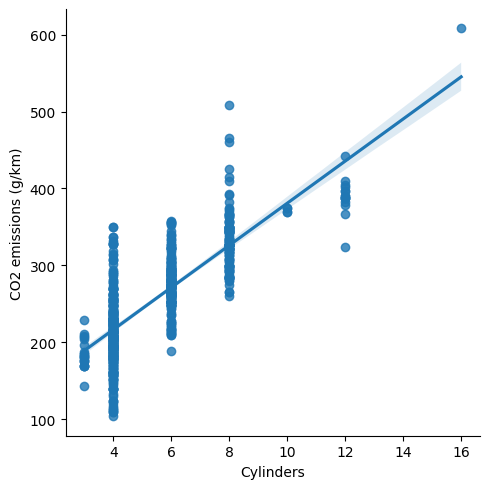

In [44]:
sns.lmplot(data = df , x = "Cylinders", y = "CO2 emissions (g/km)")

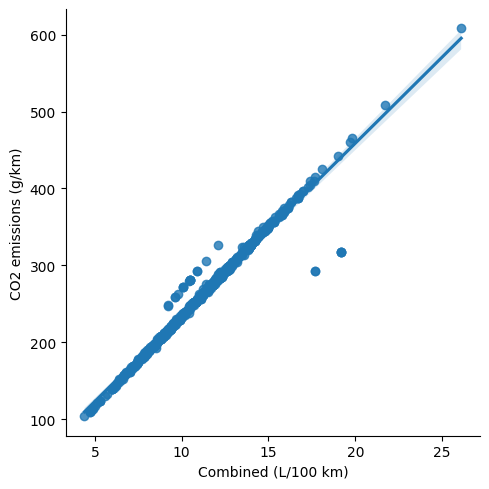

In [45]:
sns.lmplot(data = df , x = "Combined (L/100 km)", y = "CO2 emissions (g/km)")

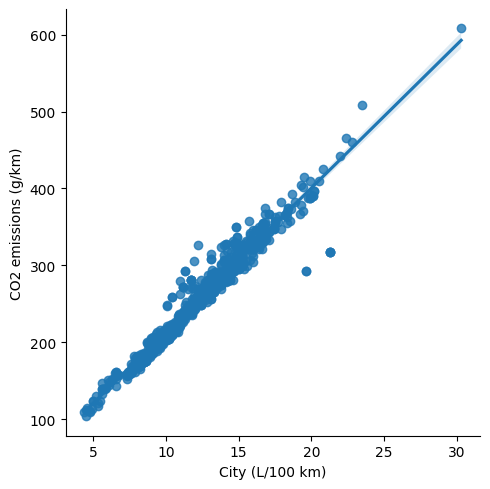

In [46]:
sns.lmplot(data = df , x = "City (L/100 km)", y = "CO2 emissions (g/km)")

<b> After we apply multiple linear regression we should clean the dataset</b>

In [17]:
df.Transmission.unique()

array(['AV7', 'M6', 'AS10', 'A8', 'A9', 'AM7', 'AS8', 'AM8', 'AV', 'A6',
       'A10', 'AS9', 'M7', 'AV1', 'AM6', 'AS7', 'AV8', 'AV6', 'AS6',
       'AV10', 'M5', 'AS5'], dtype=object)

In [18]:
df['Fuel type'].unique()

array(['Z', 'X', 'D', 'E'], dtype=object)

In [19]:
#covert object to numerical values
df['Fuel type'] = df['Fuel type'].astype("category")
df['Fuel type'] = df['Fuel type'].cat.codes

In [20]:
df['Transmission'] = df['Transmission'].astype("category")
df['Transmission'] = df['Transmission'].cat.codes

<b>Diveded the data into train data and label data</b>

In [23]:
x = df.iloc[:,4:11]

In [24]:
x

,Engine size (L),Cylinders,Transmission,Fuel type,City (L/100 km),Highway (L/100 km),Combined (L/100 km)
0,1.5,4,17,3,8.1,6.5,7.4
1,1.5,4,20,3,8.9,6.5,7.8
2,2.0,4,20,3,11.1,8.3,9.9
3,3.5,6,7,3,12.6,9.4,11.2
4,3.0,6,7,3,13.8,11.2,12.4
...,...,...,...,...,...,...,...
734,2.0,4,11,3,10.0,7.5,8.9
735,2.0,4,11,3,10.7,8.1,9.5
736,2.0,4,11,3,9.9,7.8,9.0
737,2.0,4,11,3,10.6,8.3,9.6


In [25]:
y = df["CO2 emissions (g/km)"]

In [26]:
y

0      172
1      181
2      230
3      263
4      291
      ... 
734    207
735    223
736    210
737    226
738    230
Name: CO2 emissions (g/km), Length: 739, dtype: int64

<b>Devided the data into train and test data</b>

In [29]:
from sklearn.model_selection import train_test_split

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.4, random_state = 24 )

In [32]:
x_train

,Engine size (L),Cylinders,Transmission,Fuel type,City (L/100 km),Highway (L/100 km),Combined (L/100 km)
275,3.5,6,11,3,12.9,10.0,11.6
631,4.0,8,11,3,15.5,11.8,13.8
157,6.2,8,11,3,15.0,9.4,12.5
729,1.5,4,5,2,9.9,7.5,8.8
582,4.0,6,20,3,14.0,10.0,12.2
...,...,...,...,...,...,...,...
145,3.6,6,20,2,14.3,9.0,11.9
401,2.5,4,6,2,9.9,7.3,8.7
343,2.0,4,14,2,8.1,6.8,7.5
192,3.0,6,0,0,11.0,8.4,9.8


<b>Apply multiple linear regression model</b>

In [48]:
from sklearn.linear_model import LinearRegression

In [49]:
lr = LinearRegression()

In [50]:
lr.fit(x_train, y_train)

LinearRegression()

<b>Find the coefficient and intercept</b>

In [52]:
#Intercept
c = lr.intercept_
print("Intercept %2f" % c)

Intercept 13.106181


In [55]:
#coefficient 
m = lr.coef_
print("coefficient :", m)

coefficient : [-1.44963372  2.32784473 -0.13102094 -0.57694514  9.06034165  7.26086122
  5.35078379]


<b>Test the model (Train data)</b>

In [56]:
y_pred_train = lr.predict(x_train)

In [57]:
y_pred_train

array([270.38357708, 322.71261251, 290.61116166, 209.67485321,
       281.65641786, 218.71707711, 305.7709847 , 286.99249595,
       300.90150899, 273.75074926, 185.79507039, 199.8842446 ,
       342.17329186, 229.98503836, 346.06499849, 241.41258361,
       250.26132632, 361.60157918, 168.87991119, 297.93528933,
       439.71955717, 321.12761735, 138.56060294, 131.7089013 ,
       316.4715829 , 258.66136202, 252.04772817, 221.66634935,
       188.92104682, 173.04674215, 207.18547888, 349.26948964,
       198.04421308, 247.27742864, 312.84762262, 218.5815642 ,
       275.0473185 , 341.0848451 , 439.71955717, 221.7097443 ,
       190.18697707, 286.89431083, 252.28841345, 330.34846975,
       301.08927918, 323.56758452, 319.84552191, 220.71668655,
       165.2498371 , 348.10719643, 311.67696683, 319.59307638,
       188.64324457, 260.91804583, 323.56758452, 334.0111746 ,
       249.16560301, 230.02316295, 321.54782673, 158.24533898,
       232.0812556 , 350.64708603, 178.91748243, 407.73

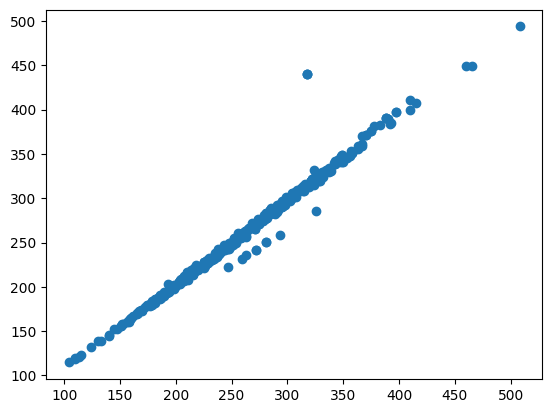

In [60]:
plt.scatter(y_train, y_pred_train)

In [62]:
from sklearn.metrics import r2_score

In [64]:
r2_score(y_train , y_pred_train)

0.9682724537886259

On the basis of train data the model shows that , 96% of total variable can be explained by the dependent varibale...

<b>Test the model (Test data)</b>

In [66]:
y_pred_test = lr.predict(x_test)

In [67]:
y_pred_test

array([331.67032184, 265.30453579, 320.1616174 , 212.85470765,
       240.19761824, 278.64063331, 223.09519801, 294.76561095,
       272.12339472, 266.9390296 , 307.50221939, 203.90767295,
       231.48619042, 216.92842729, 272.46123649, 296.60026242,
       272.12339472, 166.93212124, 278.85623938, 321.12761735,
       214.34561999, 184.74942091, 250.26132632, 277.19952076,
       272.12339472, 367.53232471, 274.35807833, 182.97670131,
       231.95023466, 344.7044928 , 323.50239864, 289.26488295,
       406.1129086 , 229.97397866, 231.96528135, 326.6345234 ,
       318.39334966, 329.3106483 , 300.43191599, 273.52426359,
       441.18432255, 184.76786679, 321.12761735, 283.92534394,
       119.96057985, 280.25985824, 167.53200488, 365.0362363 ,
       254.8454928 , 191.53150467, 321.12761735, 170.79490352,
       201.86136233, 262.93039852, 266.70301518, 194.50573182,
       179.2934744 , 330.79526664, 319.39941498, 214.53186198,
       202.90290039, 263.7512745 , 277.31881679, 602.30

In [72]:
#MSE 
print("Residual sum of square: %2f " % np.mean((y_test - y_pred_test)**2))

Residual sum of square: 181.031678 


In [73]:
#R2
print("R2 : %2f" %r2_score(y_test, y_pred_test))

R2 : 0.957945


On the basis of test data the model shows that , 95% of total variable can be explained by the dependent varibale...